In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as px

In [2]:
df = pd.read_csv('COVID-19 Survey.csv')

In [3]:
df.head()

,ID,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most
0,R1,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1,4,Increased,NO,Cooking,YES,YES,School/college
1,R2,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,Youtube,0,3,Decreased,NO,Scrolling through social media,YES,NO,Roaming around freely
2,R3,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0,3,Remain Constant,NO,Listening to music,NO,YES,Travelling
3,R4,Delhi-NCR,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,Instagram,0,3,Decreased,NO,Watching web series,NO,NO,"Friends , relatives"
4,R5,Delhi-NCR,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,Instagram,1,4,Remain Constant,NO,Social Media,NO,NO,Travelling


In [4]:
df.shape

(1182, 19)

In [5]:
len(df)

1182

In [6]:
df.columns

Index(['ID', 'Region of residence', 'Age of Subject',
       'Time spent on Online Class', 'Rating of Online Class experience',
       'Medium for online class', 'Time spent on self study',
       'Time spent on fitness', 'Time spent on sleep',
       'Time spent on social media', 'Prefered social media platform',
       'Time spent on TV', 'Number of meals per day', 'Change in your weight',
       'Health issue during lockdown', 'Stress busters', 'Time utilized',
       'Do you find yourself more connected with your family, close friends , relatives  ?',
       'What you miss the most'],
      dtype='object')

In [7]:
df.rename(
    columns = {
        'Region of residence': 'region',
        'Age of Subject': 'age',
        'Time spent on Online Class': 'time_online_class',
        'Rating of Online Class experience': 'rating_online_class',
        'Medium for online class': 'medium',
        'Time spent on self study': 'time_self_study',
        'Time spent on fitness': 'time_fitness',
        'Time spent on sleep': 'time_sleep',
        'Time spent on social media': 'time_social_media',
        'Prefered social media platform': 'prefered_social_media',
        'Time spent on TV': 'time_tv',
        'Number of meals per day': 'num_meals_per_day',
        'Change in your weight': 'delta_weight',
        'Health issue during lockdown': 'health_issue_in_lockdown',
        'Stress busters': 'stress_busters',       
        'Time utilized': 'time_utilized',
        'Do you find yourself more connected with your family, close friends , relatives  ?': 'more_family_connected',
        'What you miss the most': 'miss_most'
    }, inplace=True)

In [8]:
df.head()

,ID,region,age,time_online_class,rating_online_class,medium,time_self_study,time_fitness,time_sleep,time_social_media,prefered_social_media,time_tv,num_meals_per_day,delta_weight,health_issue_in_lockdown,stress_busters,time_utilized,more_family_connected,miss_most
0,R1,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1,4,Increased,NO,Cooking,YES,YES,School/college
1,R2,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,Youtube,0,3,Decreased,NO,Scrolling through social media,YES,NO,Roaming around freely
2,R3,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0,3,Remain Constant,NO,Listening to music,NO,YES,Travelling
3,R4,Delhi-NCR,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,Instagram,0,3,Decreased,NO,Watching web series,NO,NO,"Friends , relatives"
4,R5,Delhi-NCR,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,Instagram,1,4,Remain Constant,NO,Social Media,NO,NO,Travelling


In [9]:
df.drop(['ID'],axis=1,inplace=True)

In [10]:
df.isna().sum()

region                       0
age                          0
time_online_class            0
rating_online_class         24
medium                      51
time_self_study              0
time_fitness                 0
time_sleep                   0
time_social_media            0
prefered_social_media        0
time_tv                      0
num_meals_per_day            0
delta_weight                 0
health_issue_in_lockdown     0
stress_busters               0
time_utilized                0
more_family_connected        0
miss_most                    0
dtype: int64

In [11]:
df['rating_online_class'].unique()

array(['Good', 'Excellent', 'Very poor', 'Average', nan, 'Poor'],
      dtype=object)

In [12]:
df['medium'].unique()

array(['Laptop/Desktop', 'Smartphone', 'Tablet', nan, 'Any Gadget',
       'Smartphone or Laptop/Desktop'], dtype=object)

In [13]:
df['rating_online_class'].replace(np.nan,'Average',inplace=True)
df['medium'].replace(np.nan,'Any Gadget',inplace=True)

In [14]:
df.head()

,region,age,time_online_class,rating_online_class,medium,time_self_study,time_fitness,time_sleep,time_social_media,prefered_social_media,time_tv,num_meals_per_day,delta_weight,health_issue_in_lockdown,stress_busters,time_utilized,more_family_connected,miss_most
0,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1,4,Increased,NO,Cooking,YES,YES,School/college
1,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,Youtube,0,3,Decreased,NO,Scrolling through social media,YES,NO,Roaming around freely
2,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0,3,Remain Constant,NO,Listening to music,NO,YES,Travelling
3,Delhi-NCR,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,Instagram,0,3,Decreased,NO,Watching web series,NO,NO,"Friends , relatives"
4,Delhi-NCR,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,Instagram,1,4,Remain Constant,NO,Social Media,NO,NO,Travelling


In [33]:
df.nunique()

region                       2
age                         42
time_online_class           21
rating_online_class          5
medium                       5
time_self_study             23
time_fitness                11
time_sleep                  18
time_social_media           22
prefered_social_media       15
time_tv                     21
num_meals_per_day            8
delta_weight                 3
health_issue_in_lockdown     2
stress_busters              86
time_utilized                2
more_family_connected        2
miss_most                    8
dtype: int64

In [15]:
df['time_tv'].unique()

array(['1', '0', '3', '0.5', 'n', '2', '4.5', '1.5', 'N', '4', '0.3', '5',
       'No tv', '0.1', '0.25', '6', '0.6', '7', '8', '15', ' ', '0.75',
       '2.5', '3.5', '0.4'], dtype=object)

In [16]:
df['time_tv'].replace({'n':'0','N':'0','No tv':'0',' ':'0'},inplace=True)
df['time_tv'].astype('float', copy = True)

0       1.0
1       0.0
2       0.0
3       0.0
4       1.0
       ... 
1177    2.0
1178    1.0
1179    2.0
1180    1.0
1181    1.0
Name: time_tv, Length: 1182, dtype: float64

In [17]:
df['prefered_social_media'].value_counts()

Instagram    352
Whatsapp     336
Youtube      314
Linkedin      61
Facebook      52
Twitter       28
None          17
Snapchat       8
Reddit         5
Telegram       3
Quora          1
WhatsApp       1
Talklife       1
None           1
Omegle         1
Elyment        1
Name: prefered_social_media, dtype: int64

In [20]:
df['prefered_social_media'].replace({'None':'None','Whatsapp':'WhatsApp'},inplace=True)

In [21]:
df['prefered_social_media'].value_counts()

Instagram    352
WhatsApp     337
Youtube      314
Linkedin      61
Facebook      52
Twitter       28
None          17
Snapchat       8
Reddit         5
Telegram       3
Quora          1
Talklife       1
None           1
Omegle         1
Elyment        1
Name: prefered_social_media, dtype: int64

In [22]:
df['miss_most'].value_counts()

School/college                                                                                                                                                                                                              379
Friends , relatives                                                                                                                                                                                                         223
Travelling                                                                                                                                                                                                                  183
Roaming around freely                                                                                                                                                                                                       149
Eating outside                                                                                          

In [29]:
df['miss_most'].replace(
    [
        'All the above',
        'All of the above ',
        'everything',
        'All above',
        'all of the above',
        'ALL','all',
        'All of the above',
        'all of them',
        'All of them',
        'All '
    ],
    'All', inplace=True)

In [30]:
df['miss_most'].replace(
[
    'NOTHING',
        'Nothing this is my usual life',
        'To stay alone. ',
        'Nothing ',
        'Nah, this is my usual lifestyle anyway, just being lazy....',
        'Normal life',
        'My normal routine',
        'nothing',
        'Job',
        'I have missed nothing',
        'Previous mistakes',
        '.',
        'I have missed nothing ',
        'Internet'
    ],
    'Nothing',inplace=True)

In [31]:
df['miss_most'].replace(
[
    'Only friends',
        'Friends , relatives',
        'relatives and friends',
        'Family ',
        'The idea of being around fun loving people but this time has certainly made us all to reconnect (and fill the gap if any) with our families and relatives so it is fun but certainly we do miss hanging out with friends',
        'Family',
        'Friends, relatives & travelling',
        'Travelling & Friends',
        'School and friends',
        'Friends and School',
        'Eating outside and friends.',
        'School and friends.',
        'school, relatives and friends',
        'School and my school friends'
    ],
    'Friends/Relatives/Family',inplace=True)

In [32]:
df['miss_most'].replace(
    [
        'Playing',
        'Roaming around freely',
        'Taking kids to park',
        'Being social ',
        'Friends and roaming around freely',
        'Friends,Romaing and traveling',
        'Metro',
        'Going to the movies',
        'Gym',
        'Football',
        'Badminton in court'
    ],
    'Passing Time Outside', inplace=True)

In [34]:
df['stress_busters'].value_counts()

Listening to music                276
Online gaming                     175
Watching web series               102
Reading books                      77
Scrolling through social media     74
                                 ... 
Painting                            1
Calling friends                     1
Many among these                    1
Playing                             1
Sketching and writing               1
Name: stress_busters, Length: 86, dtype: int64

In [35]:
df['stress_busters'].replace(
    [
        ['Sleep'],
        ['Scrolling through social media'],
        ['Reading books'],
        ['Talking to your relatives']
    ],
    ['Sleeping', 'Social Media', 'Reading', 'Talking'], inplace=True)

In [36]:
df['stress_busters'].replace(
    [
        'Exercising','Exercise','Gym','Workout ','Cardio',
        'workout','working out and some physical activity'
    ],
    'Exercise/Gym', inplace=True)

In [37]:
df['stress_busters'].replace([
    'Talking with friends ','Talking','Talking to friends','With a friend',
    'Calling friends','Taking with parents','Talk with childhood friends.',
], 'Talking', inplace=True)

In [38]:
df['stress_busters'].replace([
    'Listening to music',' listening music, motion design, graphic design, sleeping.',
    'singing','Workout and listening music',
    'Both listining music and scrolling down social media',
    'Listening to music and reading books both . ',
    'Poetry, writing books and novels , listening to music too'
], 'Music', inplace=True)

In [39]:
df['stress_busters'].replace([
    'Online surfing','live stream watching','Watching orgasm releasing videos','Anime Manga',
    'Watching ted talks and music and books','Watching YouTube ','Internet',
    'Online gaming , surfing and listening to music ','Web Series','Watching web series',
    'Netflix, Friends and Books','Youtube'
], 'Internet Surfing', inplace=True)

In [41]:
df['stress_busters'].replace([
    'Coding and studying for exams',
    'sketching,reading books,meditation,songs',
    'Many of these',
    'All reading books watching web series listening to music and talking to friends',
    'Many among these ',
    'Do some home related stuff',
    'watching movies,reading books,games,listening to music,sleep,dancing',
    'Reading books, music, exercise',
    'Whatever want','listening to music,reading books and dancing.',
], 'Many Things', inplace=True)

In [42]:
df['stress_busters'].replace([
    'Reading','drawing','Dancing','Meditation','Driving','Drawing, painting','Forming ','Painting','Sketching',
    'Sports','Painting ','Drawing','Football','Business','Running','I run','Drawing and painting and sketching',
    'I play Rubiks cube','Indoor Games','I cant de-stress myslef','Writing my own Comics & novels',
    'I have no problem of stress ','Sketching and writing','By engaging in my work.', 'Work',
    'Painting,. Sewing','Crying','Dont get distreessed','gardening cartoon','Playing ','no stress',
    'Cricket','No able to reduce the stress ','drawing ','Writing'
], 'Doing Extra Activities', inplace=True)

In [43]:
df['stress_busters'].replace([
    'Sleeping, Online games',
    'pubg'
], 'Online gaming', inplace=True)

In [46]:
df['stress_busters'].value_counts()

Music                     282
Doing Extra Activities    209
Internet Surfing          183
Online gaming             177
Sleeping                  105
Social Media              100
Talking                    62
Cooking                    41
Exercise/Gym               13
Many Things                10
Name: stress_busters, dtype: int64

In [47]:
a=df.head()

,region,age,time_online_class,rating_online_class,medium,time_self_study,time_fitness,time_sleep,time_social_media,prefered_social_media,time_tv,num_meals_per_day,delta_weight,health_issue_in_lockdown,stress_busters,time_utilized,more_family_connected,miss_most
0,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1,4,Increased,NO,Cooking,YES,YES,School/college
1,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,Youtube,0,3,Decreased,NO,Social Media,YES,NO,Passing Time Outside
2,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0,3,Remain Constant,NO,Music,NO,YES,Travelling
3,Delhi-NCR,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,Instagram,0,3,Decreased,NO,Internet Surfing,NO,NO,Friends/Relatives/Family
4,Delhi-NCR,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,Instagram,1,4,Remain Constant,NO,Social Media,NO,NO,Travelling


Text(0, 0.5, 'numeber of counts')

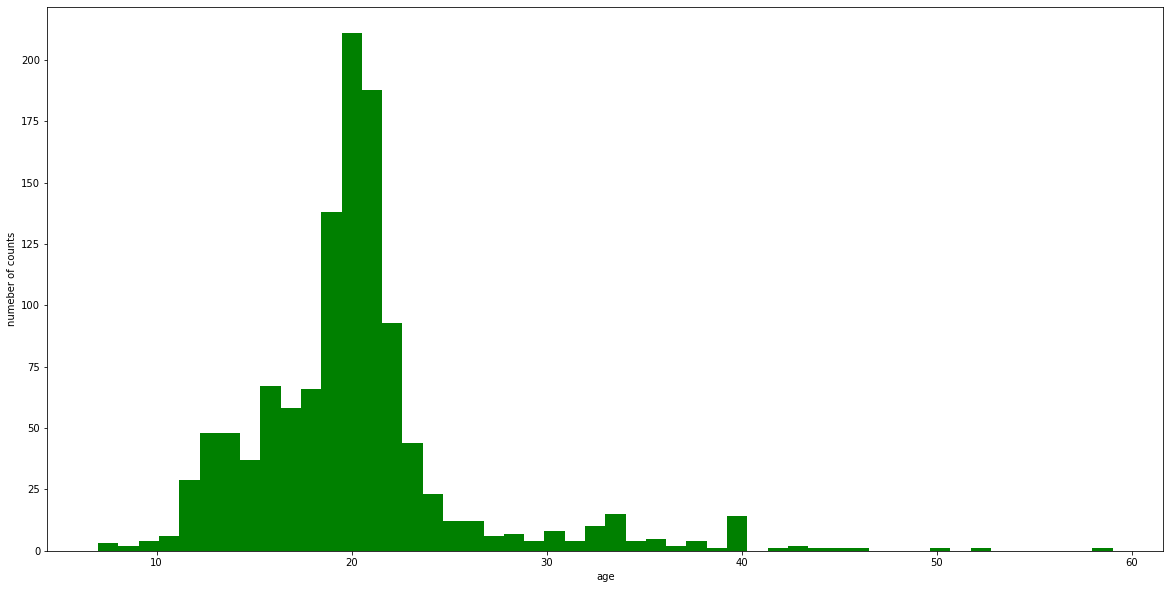

In [60]:
plt.figure(figsize=(20,10))
plt.hist(df['age'], bins=50, color='green')
plt.xlabel('age')
plt.ylabel('numeber of counts')

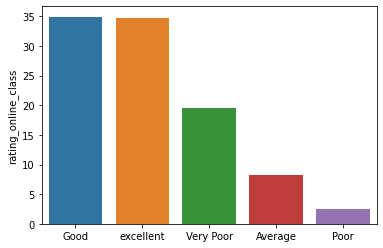

In [67]:
X = ['Good','excellent','Very Poor','Average','Poor']
Y = df['rating_online_class'].value_counts() * 100/ df['rating_online_class'].value_counts().sum()
sns.barplot(x =X,y = Y,data=df)

In [68]:
df['time_utilized'].value_counts()

NO     608
YES    574
Name: time_utilized, dtype: int64

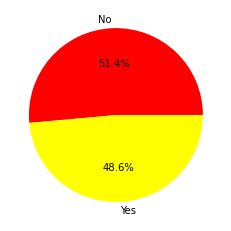

In [81]:
x = df.time_utilized.value_counts()
labels = ['No', 'Yes']
colors = ['red','yellow']
plt.pie(
    x,
    labels = labels,
    colors = colors,
    autopct = '%1.1f%%'
);

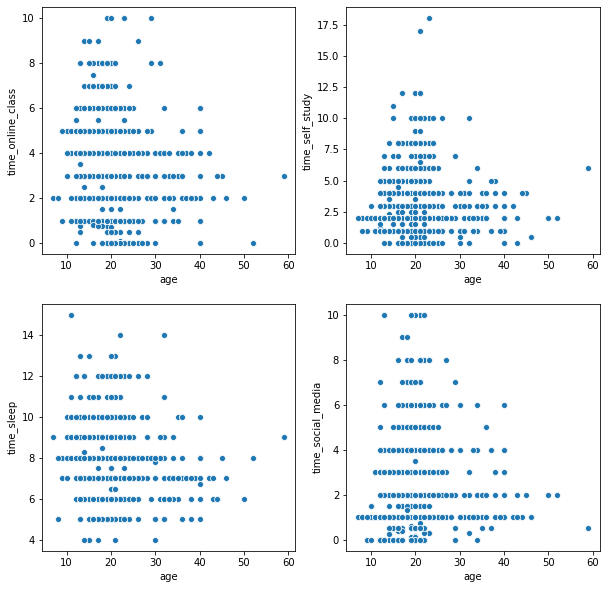

In [111]:
fig,ax = plt.subplots(2,2,figsize=(10,10))

x = df['age']
y = df['time_online_class']
sns.scatterplot(x=x, y=y, data=df,ax=ax[0,0])
x = df['age']
y = df['time_self_study']
sns.scatterplot(x=x, y=y, data=df,ax=ax[0,1])
x = df['age']
y = df['time_sleep']
sns.scatterplot(x=x, y=y, data=df,ax=ax[1,0])
x = df['age']
y = df['time_social_media']
sns.scatterplot(x=x, y=y, data=df,ax=ax[1,1])

Q1

In [105]:
df['prefered_social_media'].value_counts()

Instagram    352
WhatsApp     337
Youtube      314
Linkedin      61
Facebook      52
Twitter       28
None          17
Snapchat       8
Reddit         5
Telegram       3
Quora          1
Talklife       1
None           1
Omegle         1
Elyment        1
Name: prefered_social_media, dtype: int64

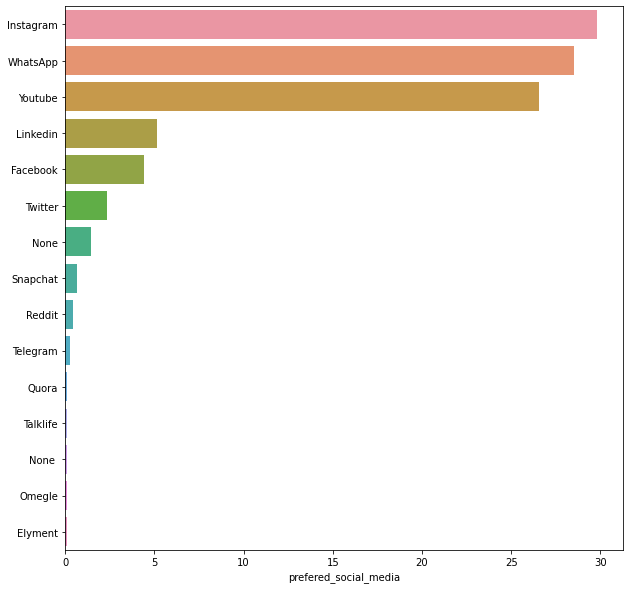

In [113]:
plt.figure(figsize=(10,10))

x1 = df['prefered_social_media'].value_counts()*100 / df['prefered_social_media'].value_counts().sum()
sns.barplot(x=x1,y=x1.index,data=df)

Q2

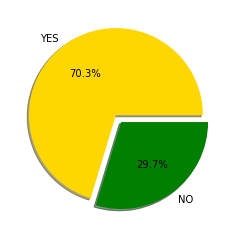

In [121]:
x = df['more_family_connected'].value_counts()
labels=["YES","NO"]
colors = ['gold','green']
plt.pie(
    x,
    labels = labels,
    colors = colors,
    autopct = '%1.1f%%',
    explode=(0, 0.1),
    shadow = True
);

Q3

In [122]:
df['miss_most'].value_counts()

School/college              379
Friends/Relatives/Family    235
Travelling                  183
Passing Time Outside        162
Eating outside              104
Colleagues                   67
Nothing                      26
All                          26
Name: miss_most, dtype: int64

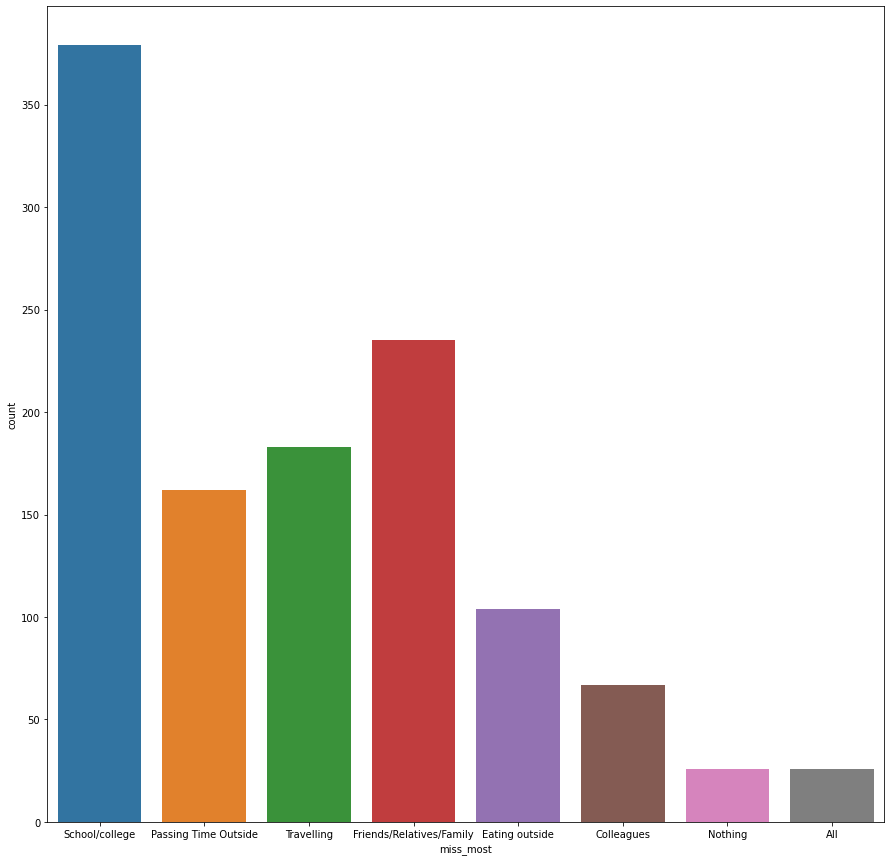

In [124]:
plt.figure(figsize=(15,15))
sns.countplot('miss_most',data=df)

Q4

In [136]:
df['delta_weight'].value_counts()

Remain Constant    535
Increased          438
Decreased          209
Name: delta_weight, dtype: int64

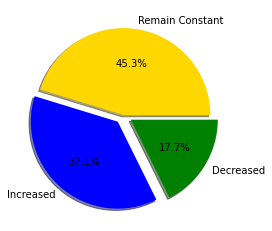

In [137]:
x = df['delta_weight'].value_counts()
labels = ['Remain Constant','Increased','Decreased']
colors = ['gold','blue','green']
plt.pie(
    x,
    labels = labels,
    colors = colors,
    autopct = '%1.1f%%',
    explode=(0, 0.1,0.1),
    shadow=True
);

In [138]:
df['stress_busters'].value_counts()

Music                     282
Doing Extra Activities    209
Internet Surfing          183
Online gaming             177
Sleeping                  105
Social Media              100
Talking                    62
Cooking                    41
Exercise/Gym               13
Many Things                10
Name: stress_busters, dtype: int64

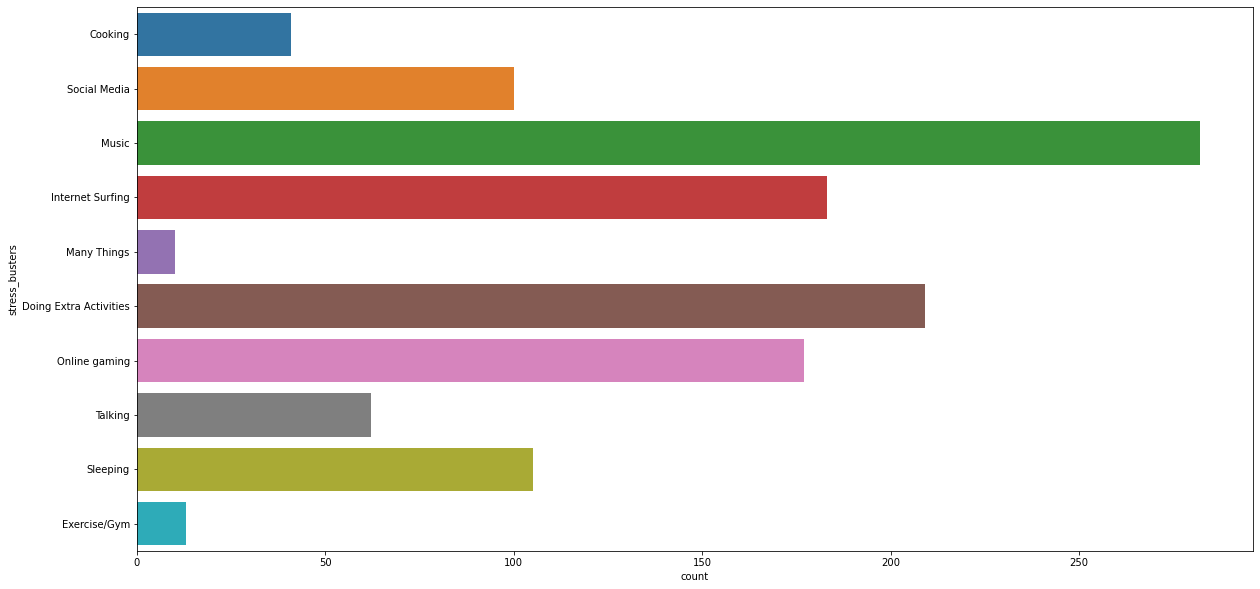

In [145]:
plt.figure(figsize=(20,10))
sns.countplot(y = df['stress_busters'],data=df)